# Problem  Statement:

The Advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like 
radio, tv, newspapers. We use linear regression to understand how spending on advertisement impacts sales
Is there any relationship between ads and sales?

 how strong is the relationship?

 What types of ads contribute to sales?
  
 what is the effect each ad type has on sales?
 
 given ad spending, can sales be predicted?


In [112]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt



In [113]:
data=pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [114]:
data.columns=['TV', 'radio', 'newspaper','sales']

In [115]:
data.shape

(200, 4)

<Axes: xlabel='newspaper', ylabel='sales'>

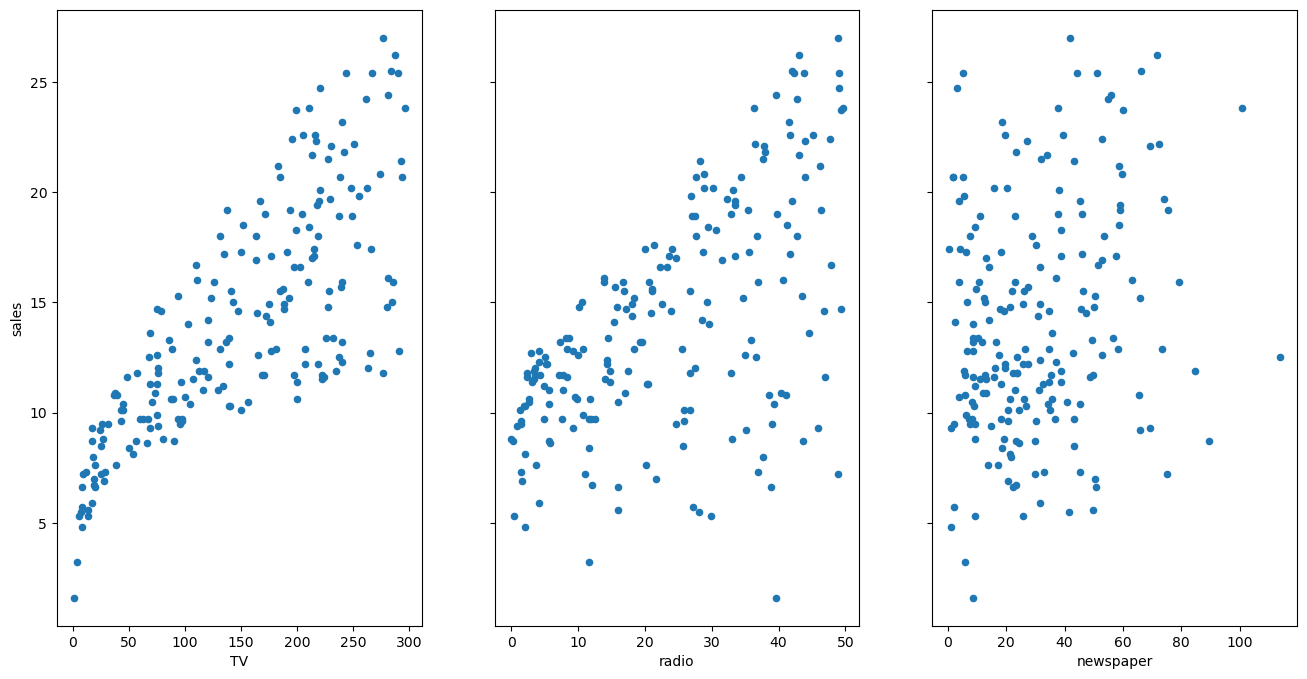

In [116]:
fig,axs=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [117]:
feature_cols=['TV']
x=data[feature_cols]
y=data.sales

In [118]:
from sklearn.linear_model import LinearRegression # linear regression on TV sales
lm=LinearRegression()
lm.fit(x,y) #fitting the model tv vs sales

LinearRegression()

In [119]:
print (lm.intercept_)
print (lm.coef_)

7.032593549127693
[0.04753664]


In [134]:
# we infer that by using TV promotion we get 0.04753664 % increase in sales
# to predict if the tv advertisement spend 50000$ in advertisement, what would be the prediction in sales

7.032593549127693+0.04753664*50

9.409425549127693

In [121]:
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [122]:
lm.predict(x_new)

array([9.40942557])

In [123]:
# Let us now make predictions for smallest and largest values of x

x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [124]:
preds=lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

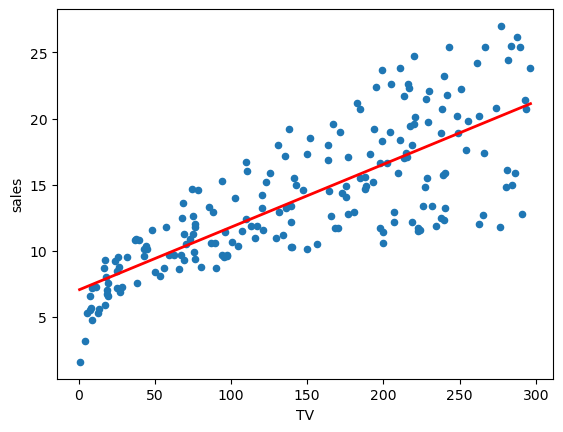

In [125]:
data.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,preds,c='red',linewidth=2)

In [126]:
# Null hypothesis - let us assume that there is no realtionship between sales and advertisement on TV

import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [127]:
lm.pvalues  # printing the p values 

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [128]:
# looking at the p values we infer that the coff for TV sales is actually close to zero.
# in this case the p value for TV is less that 0.05,
# hence we infer that there is relationship between TV advertisment on Sales 
# and hence we reject the NULL  Hypothesis

lm.rsquared

0.611875050850071

## multiple linear regression on TV, Radio and newspaper 

In [130]:
feature_cols=['TV','radio','newspaper']
x=data[feature_cols]
y=data.sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [131]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

print(lm.intercept_)
print(lm.coef_)

In [132]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [133]:
print(lm.intercept_)
print(lm.coef_)
predictions=lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))

2.70894909251591
[0.04405928 0.1992875  0.00688245]
1.9485372043446387


In [77]:
lm=smf.ols(formula='sales~TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        12:12:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# we see that tv and radio have the significant p values whereas newspaper doesnot. thus we reject the null hypothesis

In [135]:
# we see that TV and radios are positively associated with sales whereas newspaper doesnot
# we reject the Null Hypothesis for TV and Radio whereas we fail to reject the NULL Hypothesis for Newspaper

In [136]:
lm=smf.ols(formula='sales~TV+radio',data=data).fit()
lm.rsquared

0.8971942610828956

In [137]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

In [ ]:
# Let us create a new feature called Size and a categorical type and observe

In [82]:
import numpy as np
np.random.seed(12345)
nums=np.random.rand(len(data))
mask_large=nums>0.5
data['size']='small'
data.loc[mask_large,'size']='large'
data.head()

,TV,radio,newspaper,sales,size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [84]:
#data['Islarge']=data.size.map({'small':0,'large':1})
#data.head()

In [92]:
data['islarge']=data['size'].map({'small':0,'large':1})
data.head()

,TV,radio,newspaper,sales,size,islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [93]:
feature_cols=['TV','radio','newspaper','islarge']
x=data[feature_cols]
y=data.sales
lm=LinearRegression()
lm.fit(x,y)
zip(feature_cols,lm.coef_)

In [96]:
np.random.seed(123456)
nums=np.random.rand(len(data))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
data['Area']='rural'
data.loc[mask_suburban,'Area']='suburban'
data.loc[mask_urban,'Area']='urban'
data.head()


,TV,radio,newspaper,sales,size,islarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [105]:
area_dummies=pd.get_dummies(data['Area'], prefix='Area').iloc[:,1:]
data=pd.concat([data,area_dummies],axis=1)
data.head()
                    

,TV,radio,newspaper,sales,size,islarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [110]:
feature_cols=['TV','radio','newspaper','islarge','Area_suburban','Area_urban']
x=data[feature_cols]
y=data.sales
lm=LinearRegression()
lm.fit(x,y)
print(feature_cols, '\n', lm.coef_)

['TV', 'radio', 'newspaper', 'islarge', 'Area_suburban', 'Area_urban'] 
 [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [138]:
# We infer that suburban has decrease in sales compared to the urban areas has more sales